#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 4
### Due: Monday, Feb 21th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 21th.

---

## Problem 1

Let $\mu$ be a real number. Let $\sigma$ be a strictly positive real number.

Show that for a Gaussian distribution $\mathscr{N}(\mu,\sigma)$, the mode is its mean $\mu$.

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

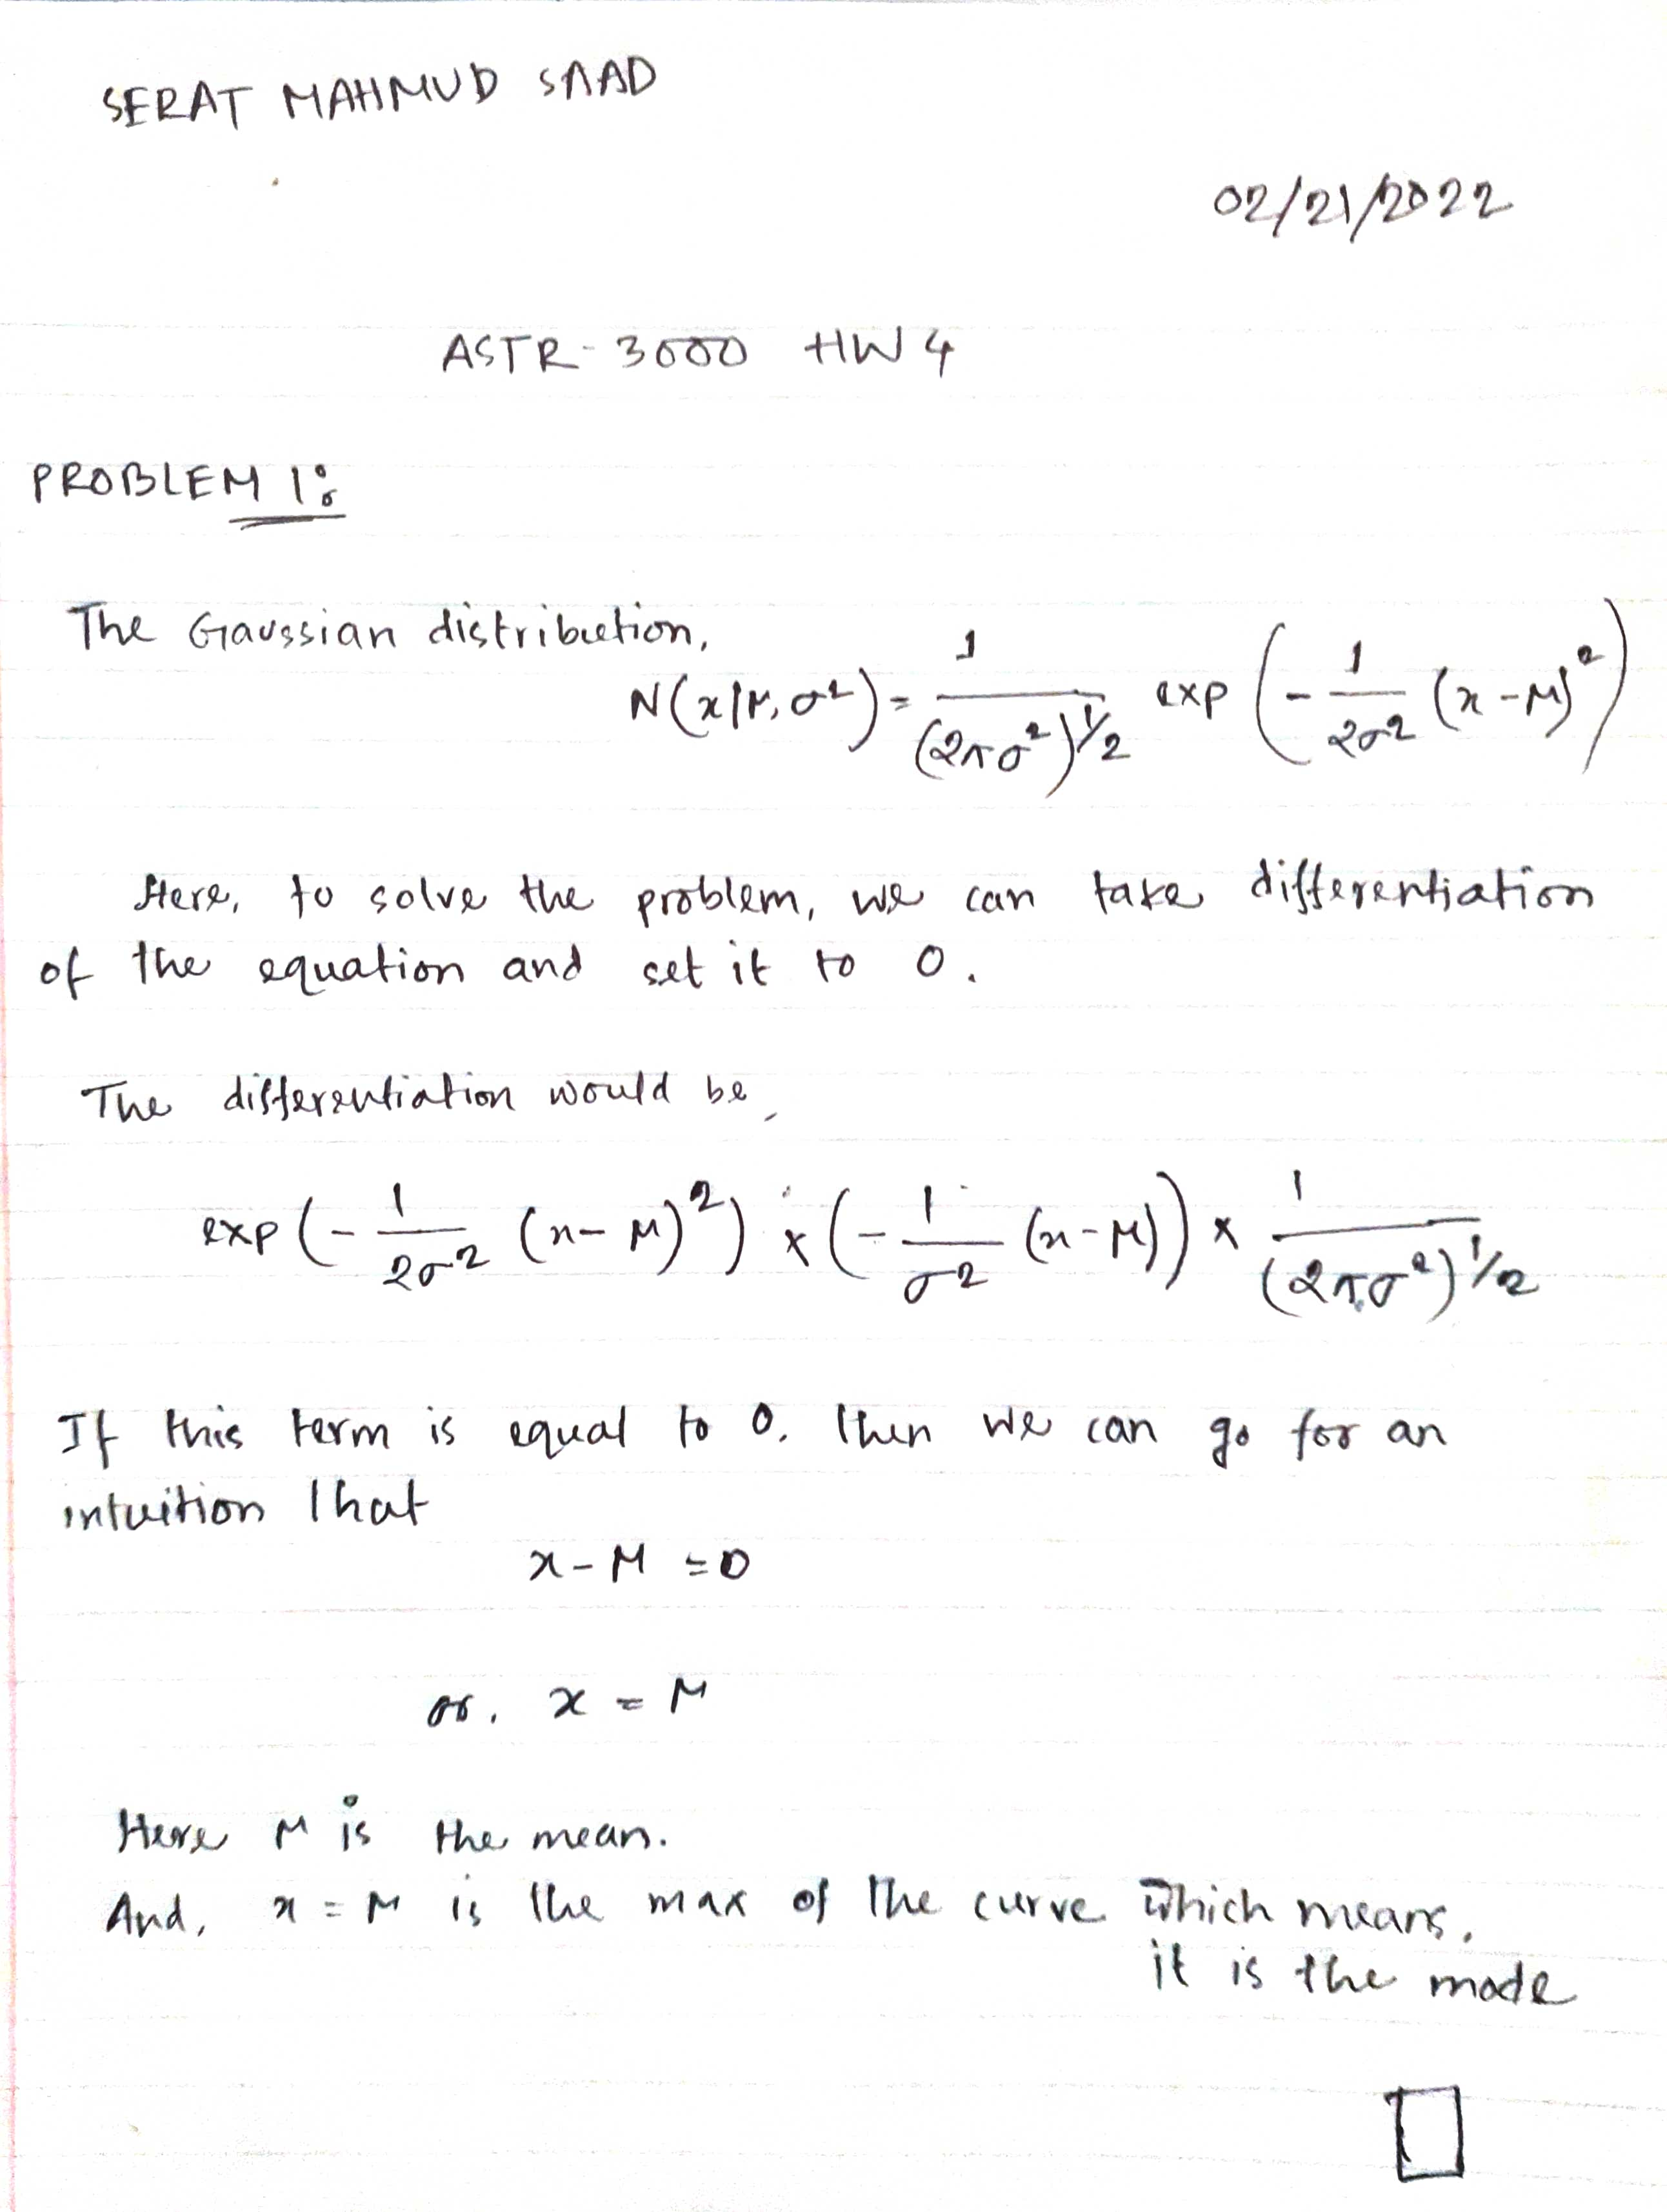

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with the given $\mu$ and $\sigma$. a) Plot the distribution, b) give 10 random draws, along with the pdf at each of the draws. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 130? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?



### Solution



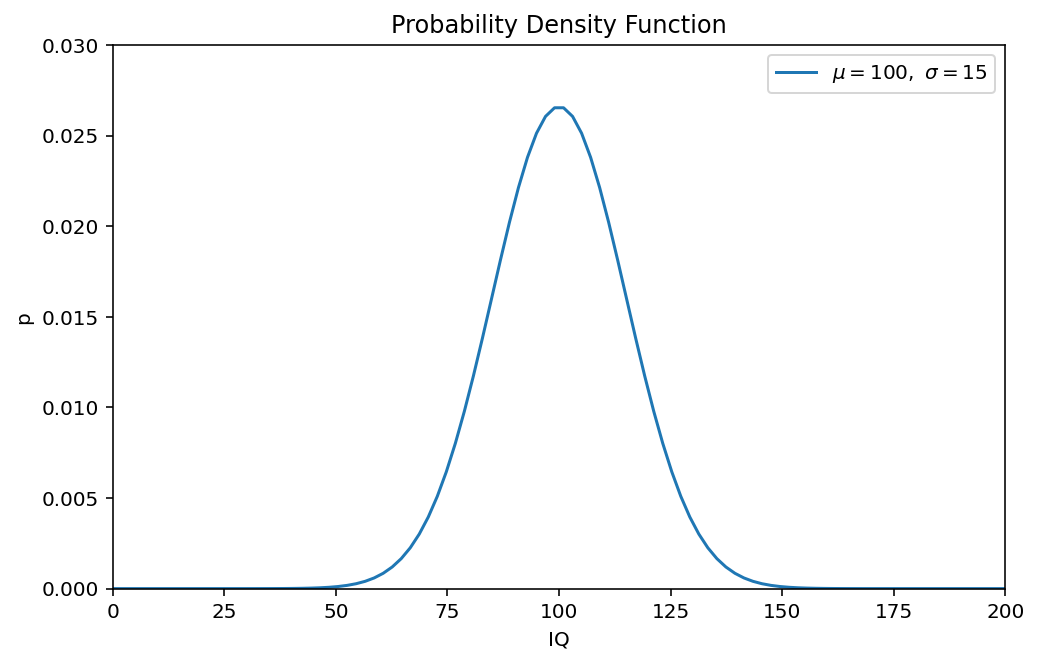

In [1]:
# Importing all the necessary tools
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

# Creating a Gaussian Object
# Mean = 100, std = 15
distG = scipy.stats.norm(100, 15)

# Defining variable xgrid and gaussPDF before plotting
xgrid = np.linspace(0, 200, 100) # generate distribution for a uniform grid of x values
gaussPDF = distG.pdf(xgrid)  # this is a function of xgrid

fig, ax = plt.subplots(figsize=(8, 5))

# Plotting xgrid and gaussPDF
plt.plot(xgrid, gaussPDF, label=f'$\mu={100},\ \sigma={15}$')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('IQ')
plt.ylabel('p')
plt.title('Probability Density Function')
plt.legend()
plt.show()


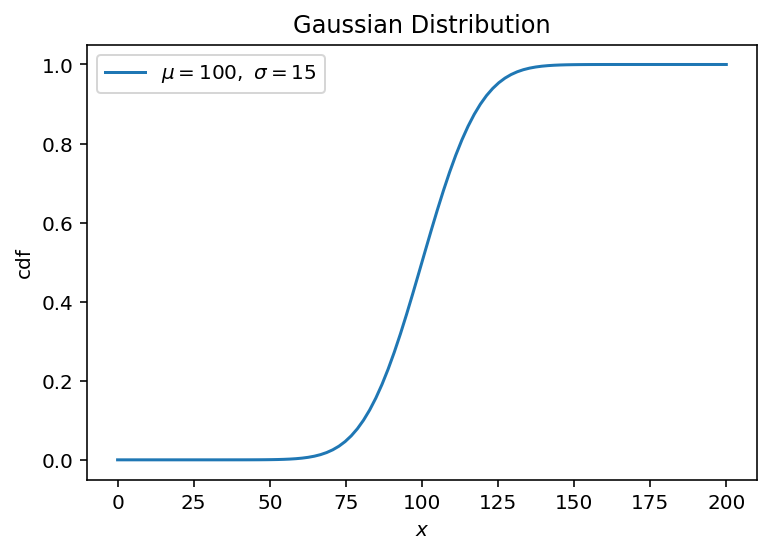

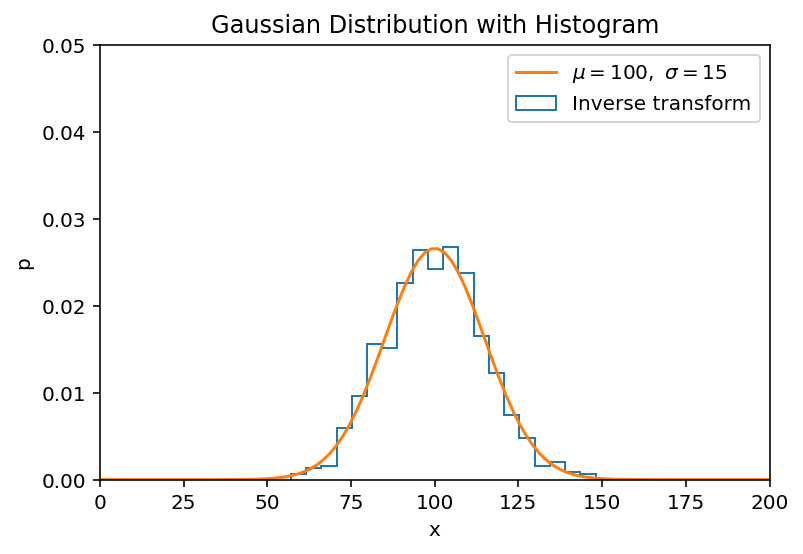

In [2]:
# Plotting the gaussian distribution
plt.plot(xgrid, distG.cdf(xgrid), ls='-', label=f'$\mu={100},\ \sigma={15}$')
plt.xlabel('$x$')
plt.ylabel(r'cdf')
plt.title('Gaussian Distribution')
plt.legend()
plt.show()


# Plotting the gaussian distribution with histogram
plt.hist(distG.ppf(np.random.uniform(size=1000)), bins=20, density=True, histtype = "step", label='Inverse transform')
plt.plot(xgrid, gaussPDF, ls='-', label=f'$\mu={100},\ \sigma={15}$')
plt.xlim(0, 200)
plt.ylim(0, 0.05)
plt.xlabel('x')
plt.ylabel('p')
plt.title('Gaussian Distribution with Histogram')
plt.legend()
plt.show()

In [3]:
# Defining necessary variables
x = 1-distG.cdf(130)
high = distG.ppf(1-(1/1000000))
low = distG.ppf(1/1000000)

# Printing the answers of (c) and (d)
print("Fraction of people with IQ higher than 130 is", x)
print("One in a million higher IQ is", high)
print("One in a million lower IQ is", low)

Fraction of people with IQ higher than 130 is 0.02275013194817921
One in a million higher IQ is 171.3013646322563
One in a million lower IQ is 28.69863536765652
